## Домашняя работа №1

### Bootstrap

Dependency management shell script 

**Restart Jupyter kernel after running this script.**

In [27]:
! pip3 install --user numpy pandas matplotlib scikit-learn umap-learn Pillow tensorflow gensim

### Package and data imports

In [8]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from PIL import Image
import glob

In [3]:
DATA_URI = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
data_frame = pandas.read_csv(DATA_URI, sep = '\t')

### Task 1

**Вывести: кол-во наблюдений в датасете**

In [4]:
data_frame.shape[0]

4622

### Task 2

**Вывести названия столбцов**

In [5]:
print(*data_frame.columns.values)

order_id quantity item_name choice_description item_price


### Task 3

**Определить самую частую позицию (item) в заказе**

In [6]:
print(*data_frame.item_name.mode())

Chicken Bowl


### Task 4

**Построить гистрограмму частоты заказов по позициям (item)**

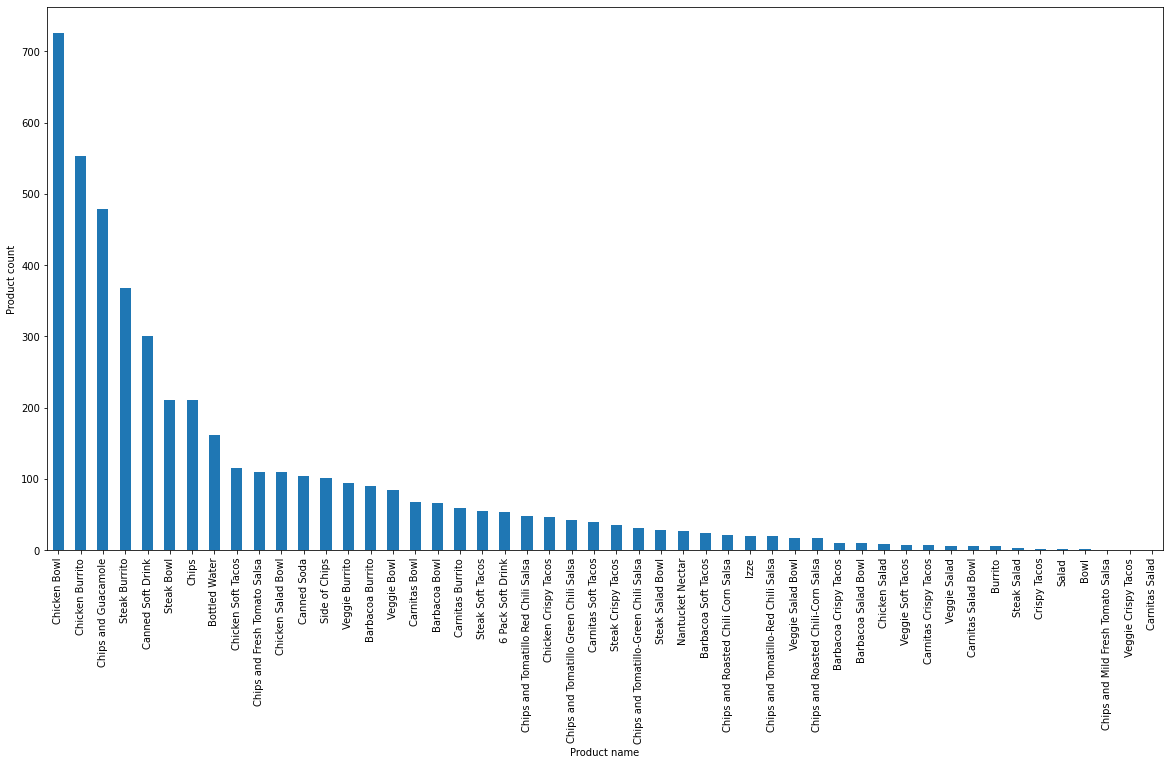

In [7]:
item_count = data_frame.item_name.value_counts()
order_frequency_histogram = item_count.plot(kind='bar', 
                                            figsize=(20, 10), 
                                            xlabel="Product name", 
                                            ylabel="Product count")

### Task 5

**Измените тип переменной item_price c с помощью лямбды функции**

In [8]:
data_frame.item_price = data_frame.item_price.apply(lambda x: float(x[1:]))

### Task 6

**Построить гистограмму кол-во денег заработанных по каждой позиции (item)**

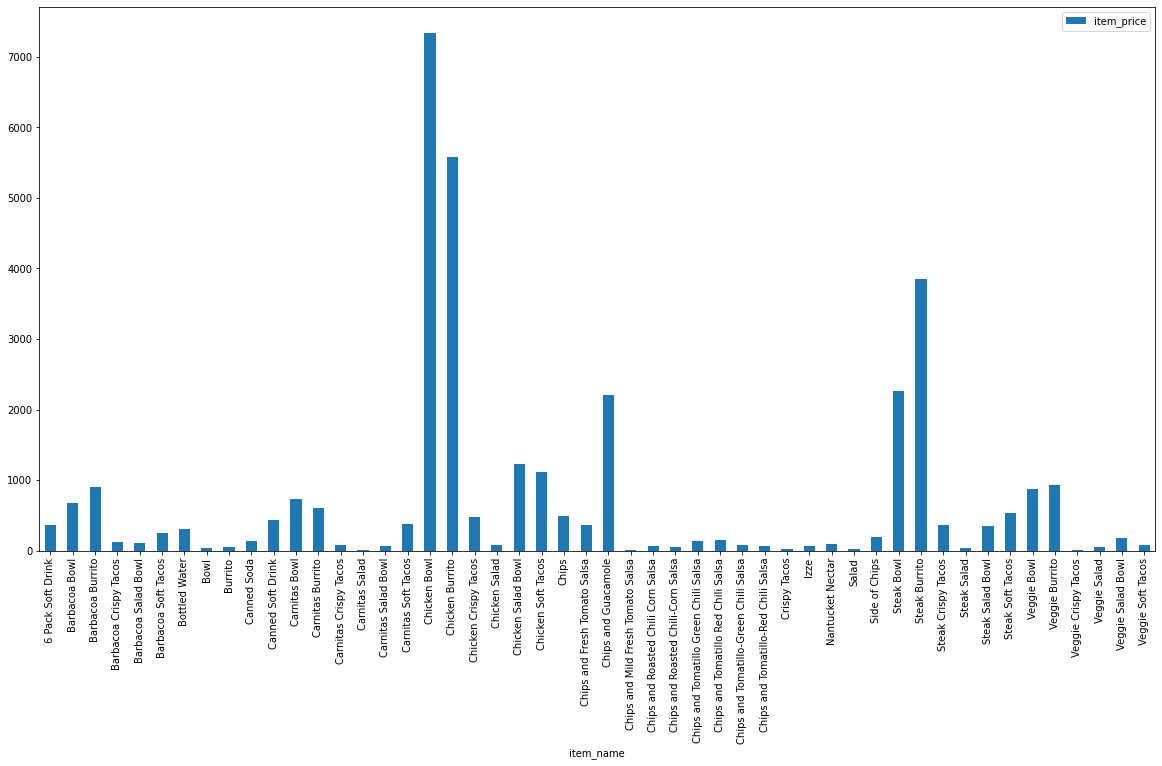

In [9]:
item_grouped = data_frame.groupby(['item_name']).sum().drop(['order_id', 'quantity'], axis=1)
item_profit_histogram = item_grouped.plot(kind='bar', figsize=(20, 10))

### Task 7

**Средняя сумма заказа? (минимум 2 способа)**

In [10]:
round(data_frame.groupby(['order_id']).sum().mean().item_price, 2)

18.81

In [11]:
round(data_frame.item_price.sum() / data_frame.order_id.nunique(), 2)

18.81

### Task 8

**Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе**

In [12]:
item_stats = data_frame.groupby(['order_id']).nunique().item_name.describe()[['mean', 'min', 'max', '50%']]
item_stats

mean    2.34024
min     1.00000
max     8.00000
50%     2.00000
Name: item_name, dtype: float64

### Task 9

**Определить статистику заказов стейков, а также статистику заказов прожарки.**

In [13]:
def get_statistics(df):
   return df.drop('order_id', axis=1).describe()

In [14]:
is_steak = data_frame.item_name.str.contains('Steak')
steak_statistics = get_statistics(data_frame[is_steak])
steak_statistics

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [15]:
has_steak_cooking_type = data_frame.choice_description.str.contains('Hot|Mild|Medium', na=False)
steak_cooking_types_statistics = get_statistics(data_frame[has_steak_cooking_type])
steak_cooking_types_statistics

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


### Task 10

**Добавить новый столбец цен на каждую позицию в заказе в рублях.**

In [16]:
USD_TO_RUB_EXCHANGE_RATE = 73.07

def get_price(price_in_usd, exchange_rate):
    return round(price_in_usd * exchange_rate, 2)

def dedupe_dataframe(df):
    return df.loc[:,~df.columns.duplicated()]

data_frame.insert(len(data_frame.columns)-1, "item_price_rub", get_price(data_frame.item_price, USD_TO_RUB_EXCHANGE_RATE), True)
data_frame = dedupe_dataframe(data_frame)
data_frame

,order_id,quantity,item_name,choice_description,item_price_rub,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,174.64,2.39
1,1,1,Izze,[Clementine],247.71,3.39
2,1,1,Nantucket Nectar,[Apple],247.71,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,174.64,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",1240.73,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",858.57,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",858.57,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",822.04,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",639.36,8.75


### Task 11

**Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.**

In [17]:
ITEM_AGGREGATOR = {
    'quantity': sum,
    'item_price': sum,
    'item_name': lambda x: ", ".join(x)
}

Группировка всех заказов

In [18]:
data_frame.groupby('order_id').agg(ITEM_AGGREGATOR)

,quantity,item_price,item_name
order_id,,,
1,4,11.56,"Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
2,2,16.98,Chicken Bowl
3,2,12.67,"Chicken Bowl, Side of Chips"
4,2,21.00,"Steak Burrito, Steak Soft Tacos"
5,2,13.70,"Steak Burrito, Chips and Guacamole"
...,...,...,...
1830,2,23.00,"Steak Burrito, Veggie Burrito"
1831,3,12.90,"Carnitas Bowl, Chips, Bottled Water"
1832,2,13.20,"Chicken Soft Tacos, Chips and Guacamole"


Группировка заказов со стейками

In [19]:
data_frame[is_steak].groupby('order_id').agg(ITEM_AGGREGATOR)

,quantity,item_price,item_name
order_id,,,
4,2,21.00,"Steak Burrito, Steak Soft Tacos"
5,1,9.25,Steak Burrito
16,1,8.99,Steak Burrito
20,1,11.75,Steak Burrito
21,1,8.99,Steak Burrito
...,...,...,...
1810,1,11.75,Steak Crispy Tacos
1818,1,9.39,Steak Salad Bowl
1829,1,11.75,Steak Burrito


### Task 12

**Определить цену по каждой позиции в отдельности.**

In [20]:
data_frame['price_per_item'] = round(data_frame['item_price'] / data_frame['quantity'], 2)

data_frame.groupby('item_name').agg({ 'price_per_item': lambda x:x.unique() })

,price_per_item
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4


In [34]:
# loaders
from keras.datasets import mnist, fashion_mnist
from matplotlib import pyplot
from gensim import models
import scipy.io
# algos
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
# utils
import time
import glob

In [ ]:
LIMIT = 

# timed reducer
# since fit_transform functions have an identical return value, return sliced run results as x, y
def timed_reducer_run(reducer, dataset):
    start = time.time()
    result = reducer.fit_transform(dataset)
    x = result[:, 0]
    y = result[:, 1]
    return [x, y, time.time() - start]
    
# algorithm runner
def runner(dataset, dataset_title, colors):   
  print("Running algos for dataset", dataset_title)
  fig, x_axis = pyplot.subplots(3, figsize=(10, 50))
  fig.suptitle(dataset_title)

  [umap_x, umap_y, umap_time] = timed_reducer_run(umap.UMAP(random_state = 2), dataset)
  print("Transform of dataset", dataset_title, "via UMAP done in: ", umap_time)
  x_axis[0].scatter(umap_x, umap_y, c=colors, cmap='Spectral', s=1)
  x_axis[0].set_title("UMAP") 
    
  [tsne_x, tsne_y, tsne_time] = timed_reducer_run(TSNE(init='pca', learning_rate='auto', n_jobs=-1, random_state=2), dataset)
  print("Transform of dataset", dataset_title, "via TSNE done in: ", tsne_time)
  x_axis[1].scatter(tsne_x, tsne_y, c=colors, cmap='Spectral', s=1)
  x_axis[1].set_title("TSNE")
    
  [pca_x, pca_y, pca_time] = timed_reducer_run(PCA(n_components=2), dataset)
  print("Transform of dataset", dataset_title, "via PCA done in: ", pca_time)
  x_axis[2].scatter(pca_x, pca_y, c=colors, cmap='Spectral', s=1)
  x_axis[2].set_title("PCA")

**Dataset import and algo execution**

Running algos for dataset COIL20
Transform of dataset COIL20 via UMAP done in:  3.083632707595825


/home/zhirnovv/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Transform of dataset COIL20 via TSNE done in:  3.1318745613098145
Transform of dataset COIL20 via PCA done in:  0.10200047492980957


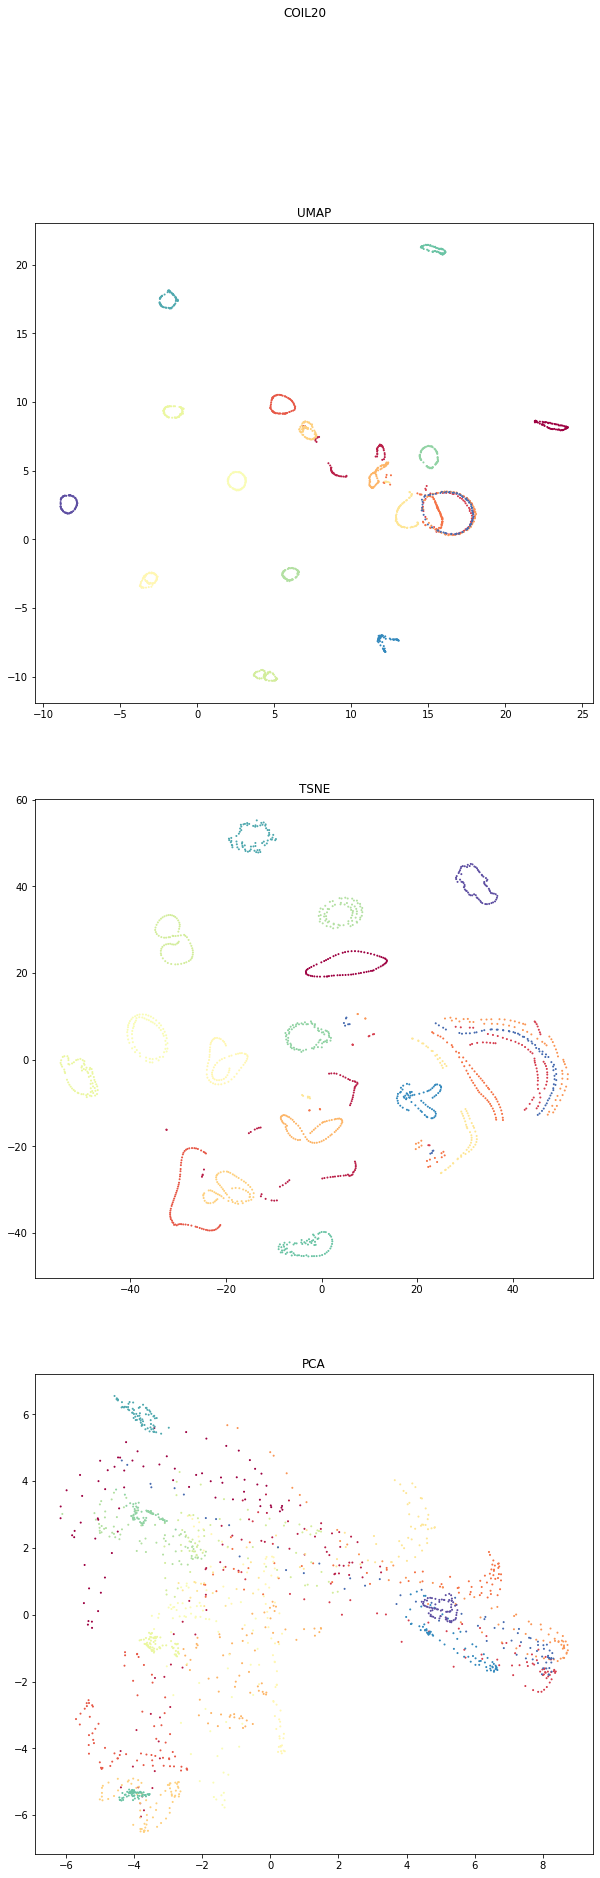

In [46]:
coil_20 = scipy.io.loadmat('./datasets/coil-20/COIL20.mat')
runner(coil_20['X'], "COIL20", coil_20['Y'])

Running algos for dataset MNIST
Transform of dataset MNIST via UMAP done in:  48.748379945755005


/home/zhirnovv/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Transform of dataset MNIST via TSNE done in:  806.5680959224701
Transform of dataset MNIST via PCA done in:  4.443643808364868


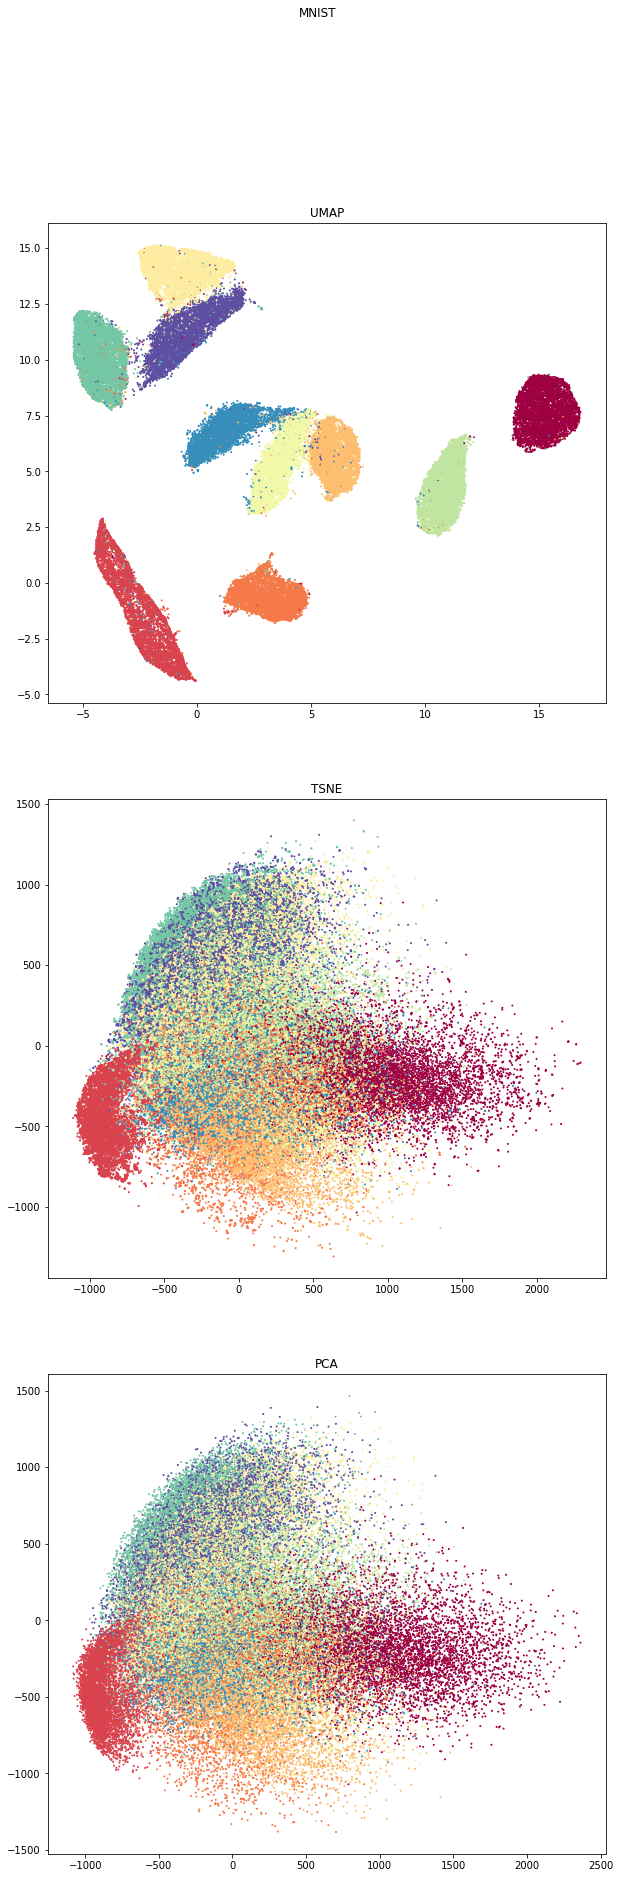

In [47]:
(mnist_train_x, mnist_train_y), (mnist_test_X, mnist_test_y) = mnist.load_data()
mnist_data = mnist_train_x.reshape(-1, 28*28)
runner(mnist_data, "MNIST", mnist_train_y)

Running algos for dataset FASHION_MNIST
Transform of dataset FASHION_MNIST via UMAP done in:  53.41822552680969


/home/zhirnovv/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Transform of dataset FASHION_MNIST via TSNE done in:  801.9907677173615
Transform of dataset FASHION_MNIST via PCA done in:  4.039729595184326


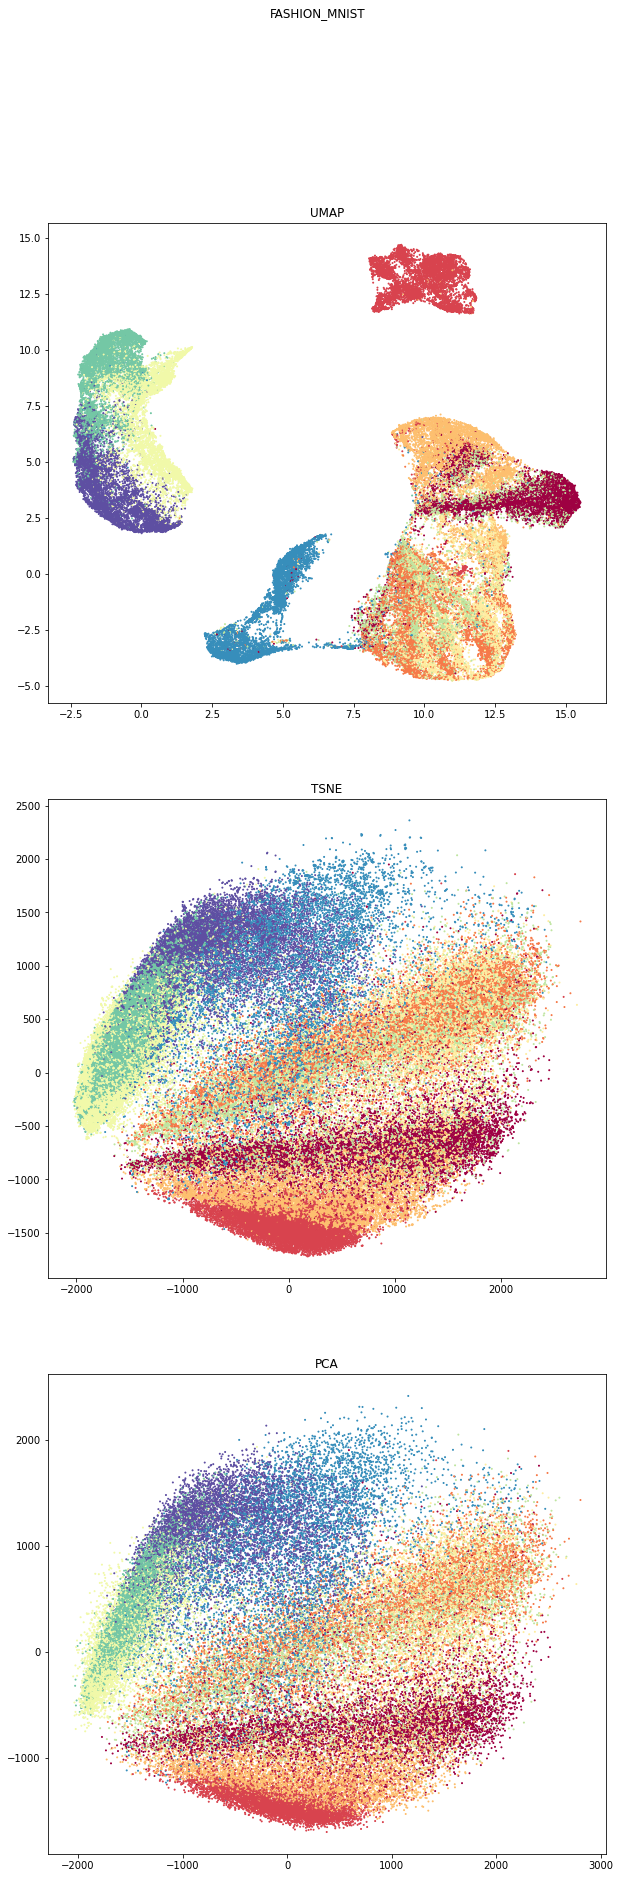

In [49]:
(fashion_mnist_train_x, fashion_mnist_train_y), (fashion_mnist_test_x, fashion_mnist_test_y) = fashion_mnist.load_data()
fashion_mnist_data = fashion_mnist_train_x.reshape(-1, 28*28)
runner(fashion_mnist_data, "FASHION_MNIST", fashion_mnist_train_y)

Running algos for dataset GOOGLE_NEWS
Transform of dataset GOOGLE_NEWS via UMAP done in:  90.37914109230042


/home/zhirnovv/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Transform of dataset GOOGLE_NEWS via TSNE done in:  979.3286151885986
Transform of dataset GOOGLE_NEWS via PCA done in:  1.0279722213745117


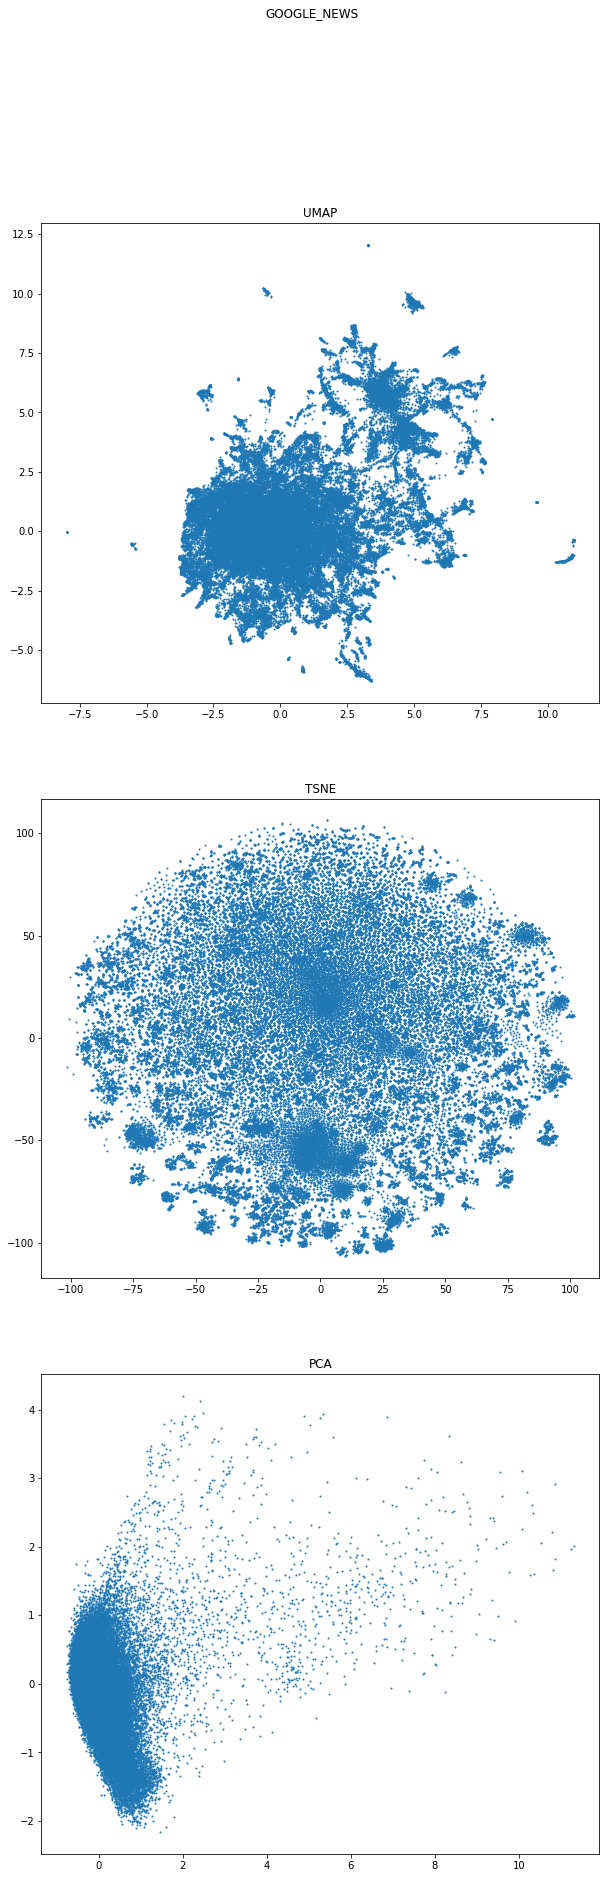

In [58]:
# change limit freely according to max RAM available
# GoogleNews word vectors are sorted by word frequency, and omitting uncommon words may not affect the result significantly
LIMIT = 70000

google_news = models.KeyedVectors.load_word2vec_format(
    './datasets/google-news-vectors/GoogleNews-vectors-negative300.bin', binary=True, limit=LIMIT)
runner(google_news.vectors, "GOOGLE_NEWS", None)

## Выводы

### Схожесть с [исходными данными](https://arxiv.org/pdf/1802.03426.pdf)

1. COIL20 - Полученные графики имеет значительную схожесть с исходными графиками;
2. MNIST - Полученные графики t-SNE отличаются от исходных, все остальные полученные графики имеют меньше отличий от исходных. Вероятные причины - использование reshape к 28х28, но в исходных данных не обговаривается, каким образом производился reshape датасета;
3. Fashion MNIST - аналогично MNIST;
4. GoogleNews - график для PCA значительно отличается от исходного, отличие возможно из-за ограничения числа векторов до 70000.

### Время работы (c.)

1. COIL20
    1.1. UMAP - 3.083632707595825
    1.2. t-SNE - 3.1318745613098145
    1.3. PCA - 0.10200047492980957
2. MNIST
    2.1. UMAP - 48.748379945755005
    2.2. t-SNE - 806.5680959224701
    2.3. PCA - 4.443643808364868
3. Fashion MNIST
    3.1. UMAP - 53.41822552680969
    3.2. t-SNE - 801.9907677173615
    3.3. PCA - 4.039729595184326
4. GoogleNews word2vec
    4.1. UMAP - 90.37914109230042
    4.2. t-SNE - 979.3286151885986
    4.3. PCA - 1.0279722213745117